In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist

In [ ]:
# Step 1: Load the MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()  # Only use images, discard labels

In [5]:
# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
# Flatten the 28x28 images into 1D vectors of size 784
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

In [9]:
# Step 2: Define the Autoencoder Architecture
input_dim = x_train_flat.shape[1]  # 784
encoding_dim = 64  # Size of compressed representation

In [11]:
# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

In [13]:
# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

In [15]:
# Autoencoder
autoencoder = Model(input_layer, decoded)

In [17]:
# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
# Step 3: Train the Autoencoder
autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat)
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3481 - val_loss: 0.1624
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1527 - val_loss: 0.1269
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1231 - val_loss: 0.1086
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1070 - val_loss: 0.0976
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0969 - val_loss: 0.0904
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0900 - val_loss: 0.0853
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0854 - val_loss: 0.0820
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0821 - val_loss: 0.0793
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0795 - val_loss: 0.0775
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0780 - val_loss: 0.0764
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0768 - val_loss: 0.0755
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

In [20]:
# Step 4: Encode and Decode Test Images
encoded_images = Model(input_layer, encoded).predict(x_test_flat)  # Encoded representation
decoded_images = autoencoder.predict(x_test_flat)  # Reconstructed images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


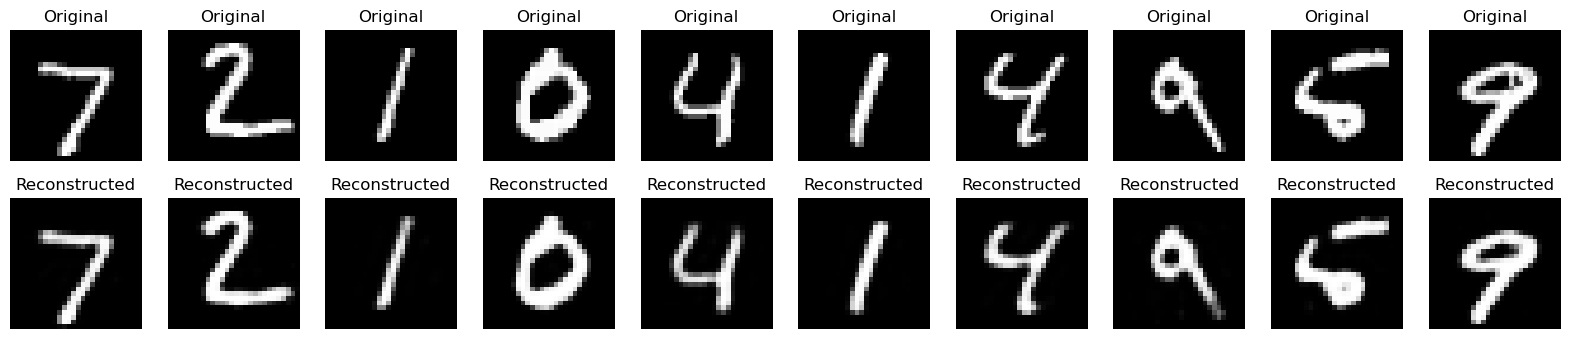

In [21]:
# Step 5: Visualize Original and Reconstructed Images
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

plot_images(x_test, decoded_images)

In [22]:
# Step 6: Save the Model (Optional)
autoencoder.save("autoencoder_model.h5")